<a href="https://colab.research.google.com/github/VinaySingh561/123/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version =1)
mnist.keys()

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
#data and target 
X,y = mnist["data"], mnist["target"]
print("X shape", X.shape)
print("Y shape", y.shape)

X shape (70000, 784)
Y shape (70000,)


In [ ]:
mnist.url

'https://www.openml.org/d/554'

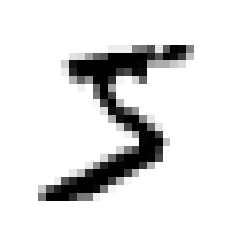

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.iloc[0].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
y.iloc[0]

'5'

"5"  indeed.

In [ ]:
#Bcz we don't want string 
import numpy as np
y = y.astype(np.uint8)

In [ ]:
# test and train data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [ ]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

# train
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

In [ ]:
#test
sgd_clf.predict(X_train.values)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True, False, False, ...,  True, False, False])

### Performance Measures

In [ ]:
# Accuracy
def Accuracy(X_train,y_train_5):
  y_true =0
  y_predict = sgd_clf.predict(X_train.values)
  for i in range(len(y_train_5)):
    if(y_predict[i]== y_train_5.values[i]):
      y_true += 1

  return round(y_true/len(y_train_5),2)    




In [ ]:
print(Accuracy(X_train,y_train_5))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


0.95


In [ ]:
# Implementing cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds  = StratifiedKFold(n_splits =3)

for train_index, test_index in skfolds.split(X_train,y_train_5):
  print(train_index,test_index)
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train.iloc[train_index] 
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train.iloc[test_index]
  y_test_fold = y_train_5[test_index]


  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495



[19964 19965 19966 ... 59997 59998 59999] [    0     1     2 ... 20331 20342 20359]
0.95035
[    0     1     2 ... 59997 59998 59999] [19964 19965 19966 ... 40088 40125 40127]
0.96035
[    0     1     2 ... 40088 40125 40127] [39988 39989 39990 ... 59997 59998 59999]
0.9604


In [ ]:
## Base model accuracy
y_predictions =  y_train_5.value_counts(normalize  = True).sort_values(ascending = False)[0]
print("Accuracy", y_predictions)




Accuracy 0.90965


In [ ]:
# that is why accuracy is not a good measure if data is skewed.

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# The cross_val_predict function takes as input a model estimator (estimator), the input data (X), and the target variable (y).
# It also takes an argument cv that specifies the cross-validation strategy. This can be either an integer (to specify the number of folds), a cross-validation object from scikit-learn, or a callable that generates the splits.
# The function then fits the estimator on each fold of the data, leaving out one fold at a time, and generates predictions on the left-out fold.
# The predictions from each fold are concatenated into a single array and returned as the output.


In [69]:
y_train_pred.shape

(60000,)

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])